In [68]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings

sjerplot = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/dpdshapefilelatlong.shp')
nonzero = sjerplot.loc[~(sjerplot["X"] == 0) & ~(sjerplot["Y"] == 0) & ~(sjerplot["Cancelled"] != 0)].copy()
nonzero = nonzero.loc[nonzero["Source"] != "Self Initiated"]
nonzero = nonzero.loc[nonzero["Cancelled"] == 0].copy()
nonzero = nonzero.loc[(nonzero["Beat"] != "DSO") & (nonzero["Beat"] != "SSA")].copy()
dpdbeats = ['511', '512', '513', '411', '111', '112', '214', '223']
dpdbeatsnonzero = nonzero[nonzero['Beat'].isin(dpdbeats)] 

print(nonzero.shape) 
nonzero.head(6)

pd.set_option("display.max_columns", 100,"display.max_rows",100)

(122782, 15)


In [2]:
nonzero.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 122803 entries, 0 to 278272
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  122803 non-null  int64   
 1   Case Numbe  34318 non-null   object  
 2   Call Date   122803 non-null  object  
 3   Call Time   122803 non-null  object  
 4   Source      122803 non-null  object  
 5   Priority    122258 non-null  object  
 6   Nature      122803 non-null  object  
 7   Address     122803 non-null  object  
 8   X           122803 non-null  int64   
 9   Y           122803 non-null  int64   
 10  District    122148 non-null  object  
 11  Beat        122128 non-null  object  
 12  Dispositio  122803 non-null  object  
 13  Cancelled   122803 non-null  int64   
 14  geometry    122803 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 15.0+ MB


In [3]:
nonzero["Source"].value_counts()

Wireless 911 Call                57069
Phone Call                       38132
Alarm Line                        9386
E-911                             8741
ASAP Alarm Interface              3806
{Other}                           2525
Language Line                     1442
Report Only                        816
Radio                              412
Texting                            287
DCI Message                        141
In House Translation                33
(blank)                              7
Telephone Device For The Deaf        6
Name: Source, dtype: int64

In [4]:
type(nonzero)

geopandas.geodataframe.GeoDataFrame

In [5]:
nonzero.total_bounds


array([-79.10436128, -82.77787819, 103.82293245,  36.24634408])

In [6]:
nonzero.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
nonzero.geom_type

0         Point
1         Point
2         Point
3         Point
4         Point
          ...  
278266    Point
278267    Point
278268    Point
278271    Point
278272    Point
Length: 122803, dtype: object

In [8]:
nonzero.shape

(122803, 15)

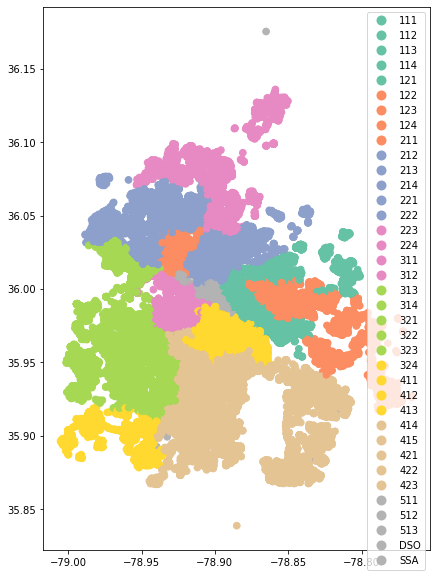

In [9]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
nonzero.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax, aspect=1);

In [10]:
policebeats = gpd.read_file('/Users/erikrobertsson/Desktop/Police_Beats/Police_Beats.shp')
# policebeats2 = policebeats.to_crs("SR-ORG:12")
# law_beat_shapefile.to_file("path/to/new/output/file.shp")
policebeats.head()

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."


In [155]:
policebeats = policebeats.to_crs("4326")
policebeats = policebeats.dissolve(by="LAWBEAT")
policebeats["Beat"] = policebeats.index
policebeats = policebeats.reset_index()
policebeats["id"] = policebeats.index
policebeats

,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat,id
0,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0
1,112,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1
2,113,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,113,2
3,114,"MULTIPOLYGON (((-78.83998 35.95407, -78.83974 ...",65,53321.980469,I,yes,D1,114,None,6.103382e+07,53321.974873,114,3
4,121,"MULTIPOLYGON (((-78.80704 35.99734, -78.80716 ...",38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4
5,122,"POLYGON ((-78.84694 36.00614, -78.84634 36.006...",54,36686.679688,I,yes,D1,122,None,3.436298e+07,36686.681354,122,5
6,123,"MULTIPOLYGON (((-78.83722 36.00417, -78.83717 ...",55,74375.859375,I,yes,D1,123,None,7.495698e+07,74375.856455,123,6
7,124,"MULTIPOLYGON (((-78.79525 35.94118, -78.79536 ...",63,10708.070312,I,no,D1,124,None,3.022588e+06,10708.070450,124,7
8,211,"POLYGON ((-78.91430 36.04098, -78.91427 36.040...",36,36748.878906,I,yes,D2,211,None,6.487864e+07,36748.875052,211,8
9,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9


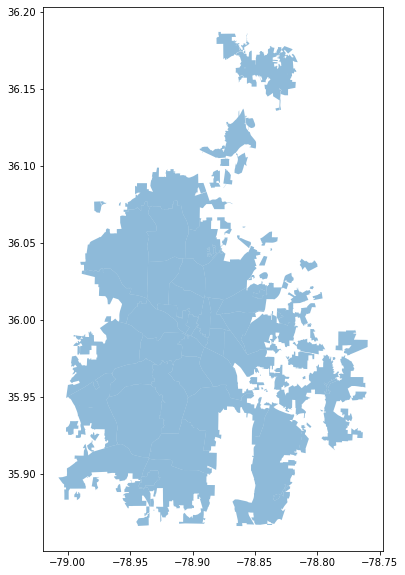

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

In [13]:
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
nonzero = gpd.GeoDataFrame(nonzero, geometry=gpd.points_from_xy(nonzero.X, nonzero.Y))
nonzero = nonzero.set_crs("epsg:2264")
nonzero.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.000 818537.000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.000 815902.000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.000 841530.000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.000 796806.000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.000 818259.000)


In [15]:
nonzero = nonzero.to_crs("EPSG:4326")
nonzero.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


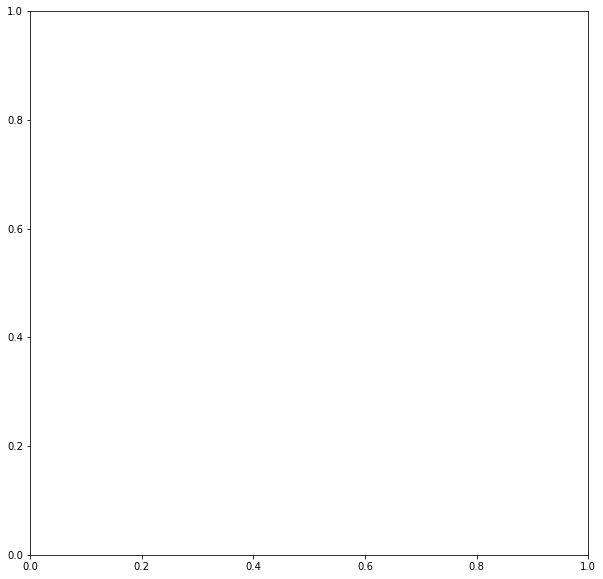

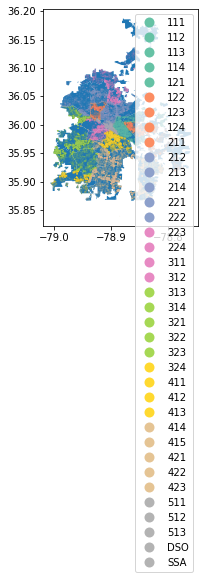

In [16]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
# base = policebeats.plot()
nonzero.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.001, 
                         cmap="Set2", ax=policebeats.plot(), aspect=1);

<AxesSubplot:>

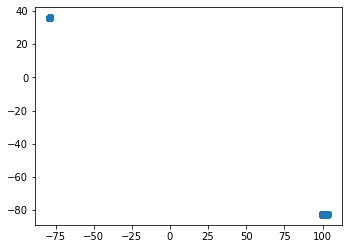

In [17]:
base = policebeats.plot()
nonzero.plot(ax = base)

In [18]:
nonzero.to_file("/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/filitered shapefile/filtereddpdshapefile.shp")

/Users/erikrobertsson/opt/miniconda3/envs/dataplus/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [19]:
# nonzero_list = [121, 122, 112, 111, 123, 114, 113, 124, 212, 214, 213, 211, 223, 222, 221, 224, 313, 312, 321, 314, 323, 324, 322, 311, 411, 415, 412, 413, 414, 422, 421, 423, 511, 512, 513]
#nonzero = nonzero.loc[nonzero["Beat"].isin(nonzero_list)].copy()
#nonzero.shape

In [20]:
ncblockmap = gpd.read_file('/Users/erikrobertsson/Downloads/Northcarolinablocksshapefiles/tl_2021_37_tabblock20.shp')
ncblockmap.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,37,037,020203,2037,370370202032037,Block 2037,G5040,R,None,None,S,2401181,1879,+35.7514163,-079.2909223,"POLYGON ((-79.29947 35.75562, -79.29942 35.756..."
1,37,105,030401,1015,371050304011015,Block 1015,G5040,R,None,None,S,537166,1888,+35.4895705,-079.1541245,"POLYGON ((-79.16050 35.48907, -79.15995 35.489..."
2,37,183,053615,2052,371830536152052,Block 2052,G5040,R,None,None,S,0,10154,+35.8791781,-078.8085709,"POLYGON ((-78.80964 35.87904, -78.80962 35.879..."
3,37,035,011501,2036,370350115012036,Block 2036,G5040,R,None,None,S,2009262,7616,+35.5829239,-081.0441821,"POLYGON ((-81.05569 35.58896, -81.05537 35.589..."
4,37,037,020201,2003,370370202012003,Block 2003,G5040,R,None,None,S,1557161,14689,+35.8325256,-079.3723536,"POLYGON ((-79.37919 35.83136, -79.37905 35.831..."


In [1]:
# quickly plot the data adding a legend
# base = policebeats.plot()
policebeats.plot(column='LAWDIST', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,10),
                         markersize=0.001, 
                         cmap="Set2", ax=ncblockmap.plot(), 
                        #  aspect=1
                         );

NameError: name 'policebeats' is not defined

In [22]:
ncblockmap = ncblockmap.to_crs("EPSG:4326")

In [23]:
racedata = pd.read_csv('/Users/erikrobertsson/Downloads/Race data files/DECENNIALPL2020.P1_data_with_overlays_2022-06-02T110204.csv', skiprows =1)
racedata['GEOID20'] = racedata['id'].str[-15:]
racedata.drop('id', axis=1, inplace=True)
racedata.columns = racedata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
racedata.columns = racedata.columns.str.replace('[#,@,&,!]', '')
racedata.columns = racedata.columns.str.replace('[:]', '_')
racedata.rename(columns = {'total_population_of_two_or_more_races_':'Total Mixed Races'}, inplace = True)
racedata.drop(racedata.iloc[:, 10:72], inplace = True, axis = 1)
racedata

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94500/838012245.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  racedata.columns = racedata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94500/838012245.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  racedata.columns = racedata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94500/838012245.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  raced

,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,Total Mixed Races,geoid20
0,"Block 1000, Block Group 1, Census Tract 1.01, ...",108,102,18,61,3,0,0,20,6,370630001011000
1,"Block 1001, Block Group 1, Census Tract 1.01, ...",35,28,13,5,0,0,0,10,7,370630001011001
2,"Block 1002, Block Group 1, Census Tract 1.01, ...",38,34,17,9,0,0,0,8,4,370630001011002
3,"Block 1003, Block Group 1, Census Tract 1.01, ...",43,43,21,19,0,0,0,3,0,370630001011003
4,"Block 1004, Block Group 1, Census Tract 1.01, ...",31,30,5,18,0,1,0,6,1,370630001011004
...,...,...,...,...,...,...,...,...,...,...,...
4396,"Block 1068, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,370639801001068
4397,"Block 1069, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,370639801001069
4398,"Block 1070, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,370639801001070
4399,"Block 1071, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,370639801001071


In [26]:
racedata["GEOID20"].head(1)

KeyError: 'GEOID20'

In [ ]:
#racedata2 = racedata.copy()
#racedata["GEOID20"] = racedata["GEOID20"].map(lambda g: str(int(g+0.1)))

TypeError: can only concatenate str (not "float") to str

In [29]:
durhamblockmap = ncblockmap[ncblockmap["COUNTYFP20"]=="063"]
len(durhamblockmap), len(ncblockmap),len(racedata),len(policebeats)

(4401, 236638, 4401, 37)

In [30]:
durhamracemap = pd.merge(racedata, durhamblockmap, left_on ='geoid20', right_on = 'GEOID20')
durhamracemap


,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,Total Mixed Races,geoid20,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,"Block 1000, Block Group 1, Census Tract 1.01, ...",108,102,18,61,3,0,0,20,6,370630001011000,37,063,000101,1000,370630001011000,Block 1000,G5040,R,None,None,S,655575,0,+36.0194814,-078.8821382,"POLYGON ((-78.88998 36.01852, -78.88995 36.019..."
1,"Block 1001, Block Group 1, Census Tract 1.01, ...",35,28,13,5,0,0,0,10,7,370630001011001,37,063,000101,1001,370630001011001,Block 1001,G5040,R,None,None,S,23209,0,+36.0205516,-078.8893121,"POLYGON ((-78.88993 36.02006, -78.88990 36.021..."
2,"Block 1002, Block Group 1, Census Tract 1.01, ...",38,34,17,9,0,0,0,8,4,370630001011002,37,063,000101,1002,370630001011002,Block 1002,G5040,R,None,None,S,17466,0,+36.0205916,-078.8869754,"POLYGON ((-78.88749 36.02015, -78.88746 36.021..."
3,"Block 1003, Block Group 1, Census Tract 1.01, ...",43,43,21,19,0,0,0,3,0,370630001011003,37,063,000101,1003,370630001011003,Block 1003,G5040,R,None,None,S,22809,0,+36.0205318,-078.8880959,"POLYGON ((-78.88872 36.01988, -78.88867 36.021..."
4,"Block 1004, Block Group 1, Census Tract 1.01, ...",31,30,5,18,0,1,0,6,1,370630001011004,37,063,000101,1004,370630001011004,Block 1004,G5040,R,None,None,S,21727,0,+36.0221289,-078.8796703,"POLYGON ((-78.88098 36.02211, -78.87992 36.022..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,"Block 1068, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,370639801001068,37,063,980100,1068,370639801001068,Block 1068,G5040,R,None,None,S,19590,0,+35.8697575,-078.8648679,"POLYGON ((-78.86527 35.87075, -78.86498 35.870..."
4397,"Block 1069, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,370639801001069,37,063,980100,1069,370639801001069,Block 1069,G5040,R,None,None,S,8413,0,+35.8691012,-078.8652956,"POLYGON ((-78.86568 35.87061, -78.86540 35.870..."
4398,"Block 1070, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,370639801001070,37,063,980100,1070,370639801001070,Block 1070,G5040,R,None,None,S,104861,0,+35.8687255,-078.8673419,"POLYGON ((-78.87003 35.86799, -78.86977 35.868..."
4399,"Block 1071, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,370639801001071,37,063,980100,1071,370639801001071,Block 1071,G5040,R,None,None,S,59161,0,+35.8957583,-078.8703320,"POLYGON ((-78.87243 35.89600, -78.87216 35.896..."


In [ ]:
durhamracemap.geometry

0       POLYGON ((-78.88998 36.01852, -78.88995 36.019...
1       POLYGON ((-78.88993 36.02006, -78.88990 36.021...
2       POLYGON ((-78.88749 36.02015, -78.88746 36.021...
3       POLYGON ((-78.88872 36.01988, -78.88867 36.021...
4       POLYGON ((-78.88098 36.02211, -78.87992 36.022...
                              ...                        
4396    POLYGON ((-78.86527 35.87075, -78.86498 35.870...
4397    POLYGON ((-78.86568 35.87061, -78.86540 35.870...
4398    POLYGON ((-78.87003 35.86799, -78.86977 35.868...
4399    POLYGON ((-78.87243 35.89600, -78.87216 35.896...
4400    POLYGON ((-78.87929 35.93618, -78.87927 35.937...
Name: geometry, Length: 4401, dtype: geometry

In [31]:
durhamracemap = durhamblockmap.set_index('GEOID20').join(racedata.set_index('geoid20'))
durhamracemap.head(3)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,Total Mixed Races
GEOID20,,,,,,,,,,,,,,,,,,,,,,,,,
370630018064007,37,063,001806,4007,Block 4007,G5040,R,None,None,S,166664,5599,+36.0127651,-078.8227713,"POLYGON ((-78.82464 36.01317, -78.82456 36.013...","Block 4007, Block Group 4, Census Tract 18.06,...",80,73,41,1,0,0,0,31,7
370630018017028,37,063,001801,7028,Block 7028,G5040,R,None,None,S,0,1715331,+36.0696478,-078.7923950,"POLYGON ((-78.80507 36.06321, -78.80467 36.063...","Block 7028, Block Group 7, Census Tract 18.01,...",0,0,0,0,0,0,0,0,0
370630021004022,37,063,002100,4022,Block 4022,G5040,R,None,None,S,3013615,21848,+36.1529771,-078.8218382,"POLYGON ((-78.83005 36.15072, -78.83001 36.150...","Block 4022, Block Group 4, Census Tract 21, Du...",88,88,82,5,0,1,0,0,0


In [32]:
durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[#,@,&,!]', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[:]', '_')
durhamracemap.head()

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94500/2631631363.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94500/2631631363.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94500/2631631363.py:2: FutureWarning: The default value of regex will change from True to False in a 

,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geometry,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races
GEOID20,,,,,,,,,,,,,,,,,,,,,,,,,
370630018064007,37,063,001806,4007,Block 4007,G5040,R,None,None,S,166664,5599,+36.0127651,-078.8227713,"POLYGON ((-78.82464 36.01317, -78.82456 36.013...","Block 4007, Block Group 4, Census Tract 18.06,...",80,73,41,1,0,0,0,31,7
370630018017028,37,063,001801,7028,Block 7028,G5040,R,None,None,S,0,1715331,+36.0696478,-078.7923950,"POLYGON ((-78.80507 36.06321, -78.80467 36.063...","Block 7028, Block Group 7, Census Tract 18.01,...",0,0,0,0,0,0,0,0,0
370630021004022,37,063,002100,4022,Block 4022,G5040,R,None,None,S,3013615,21848,+36.1529771,-078.8218382,"POLYGON ((-78.83005 36.15072, -78.83001 36.150...","Block 4022, Block Group 4, Census Tract 21, Du...",88,88,82,5,0,1,0,0,0
370630020362000,37,063,002036,2000,Block 2000,G5040,R,None,None,S,286743,3982,+35.9051346,-078.9104302,"POLYGON ((-78.91718 35.90556, -78.91702 35.905...","Block 2000, Block Group 2, Census Tract 20.36,...",1240,1174,461,580,3,95,0,35,66
370630018017041,37,063,001801,7041,Block 7041,G5040,R,None,None,S,366753,3071,+36.0558254,-078.8296616,"POLYGON ((-78.83393 36.05431, -78.83343 36.055...","Block 7041, Block Group 7, Census Tract 18.01,...",9,6,0,5,0,0,0,1,3


In [159]:
#adding new columns to durham racemap
durhamracemap['propwhite']= durhamracemap['total_population_of_one_race_white_alone'] / durhamracemap['total_']
#durhamracemap['propblack']= durhamracemap['total_population_of_one_race_black_or_african_american_alone'] / durhamracemap['total_']
#durhamracemap['area'] = durhamracemap.area
#durhamracemap['popdensity']= durhamracemap['total_'] / durhamracemap['area']
# durhamracemap.sort_values(by='popdensity', inplace=True, ascending=False)
# durhamracemap = durhamracemap.drop(labels=['370630011001003','370630020254001','370630013031012','370630020372058','370630020343006'], axis=0)
#durhamracemap.head()
durhamracemap

,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geometry,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite
GEOID20,,,,,,,,,,,,,,,,,,,,,,,,,,
370630018064007,37,063,001806,4007,Block 4007,G5040,R,None,None,S,166664,5599,+36.0127651,-078.8227713,"POLYGON ((-78.82464 36.01317, -78.82456 36.013...","Block 4007, Block Group 4, Census Tract 18.06,...",80,73,41,1,0,0,0,31,7,0.512500
370630018017028,37,063,001801,7028,Block 7028,G5040,R,None,None,S,0,1715331,+36.0696478,-078.7923950,"POLYGON ((-78.80507 36.06321, -78.80467 36.063...","Block 7028, Block Group 7, Census Tract 18.01,...",0,0,0,0,0,0,0,0,0,NaN
370630021004022,37,063,002100,4022,Block 4022,G5040,R,None,None,S,3013615,21848,+36.1529771,-078.8218382,"POLYGON ((-78.83005 36.15072, -78.83001 36.150...","Block 4022, Block Group 4, Census Tract 21, Du...",88,88,82,5,0,1,0,0,0,0.931818
370630020362000,37,063,002036,2000,Block 2000,G5040,R,None,None,S,286743,3982,+35.9051346,-078.9104302,"POLYGON ((-78.91718 35.90556, -78.91702 35.905...","Block 2000, Block Group 2, Census Tract 20.36,...",1240,1174,461,580,3,95,0,35,66,0.371774
370630018017041,37,063,001801,7041,Block 7041,G5040,R,None,None,S,366753,3071,+36.0558254,-078.8296616,"POLYGON ((-78.83393 36.05431, -78.83343 36.055...","Block 7041, Block Group 7, Census Tract 18.01,...",9,6,0,5,0,0,0,1,3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370630022002048,37,063,002200,2048,Block 2048,G5040,R,None,None,S,10849,0,+35.9949422,-078.8981501,"POLYGON ((-78.89882 35.99520, -78.89875 35.995...","Block 2048, Block Group 2, Census Tract 22, Du...",0,0,0,0,0,0,0,0,0,NaN
370630022001012,37,063,002200,1012,Block 1012,G5040,R,None,None,S,11653,0,+36.0007075,-078.9093748,"POLYGON ((-78.90950 36.00137, -78.90934 36.001...","Block 1012, Block Group 1, Census Tract 22, Du...",0,0,0,0,0,0,0,0,0,NaN
370630007003016,37,063,000700,3016,Block 3016,G5040,R,None,None,S,26136,0,+35.9725240,-078.9247163,"POLYGON ((-78.92578 35.97207, -78.92571 35.972...","Block 3016, Block Group 3, Census Tract 7, Dur...",25,24,18,6,0,0,0,0,1,0.720000


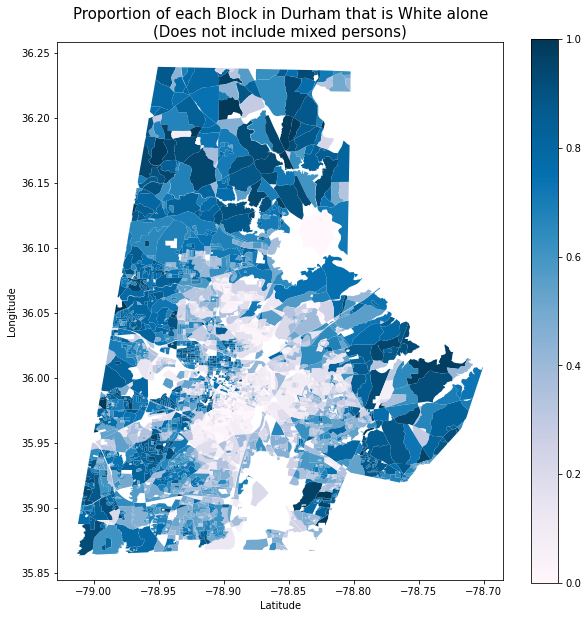

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
durhamracemap.plot(column='propwhite',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is White alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

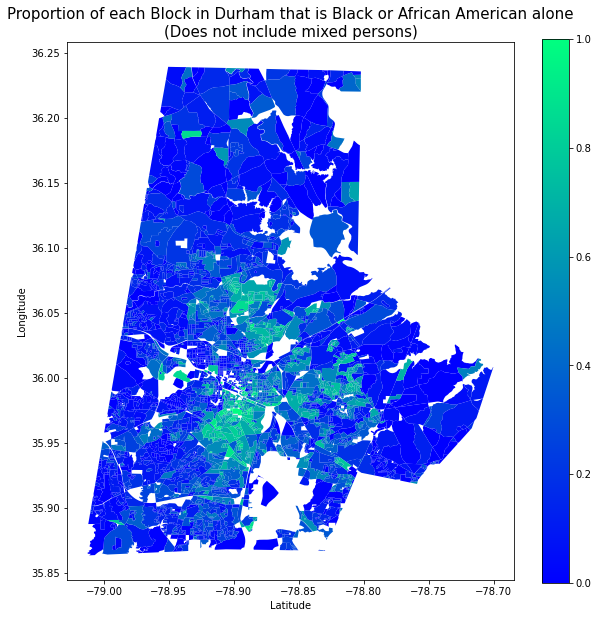

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
durhamracemap.plot(column='propblack',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is Black or African American alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
durhamracemap.columns

Index(['statefp20', 'countyfp20', 'tractce20', 'blockce20', 'name20',
       'mtfcc20', 'ur20', 'uace20', 'uatype20', 'funcstat20', 'aland20',
       'awater20', 'intptlat20', 'intptlon20', 'geometry',
       'geographic_area_name', 'total_', 'total_population_of_one_race_',
       'total_population_of_one_race_white_alone',
       'total_population_of_one_race_black_or_african_american_alone',
       'total_population_of_one_race_american_indian_and_alaska_native_alone',
       'total_population_of_one_race_asian_alone',
       'total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone',
       'total_population_of_one_race_some_other_race_alone',
       'total_population_of_two_or_more_races_',
       'total_population_of_two_or_more_races_population_of_two_races_',
       'total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american',
       'total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and

In [34]:
#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockmap.index:
    cblock_geom = durhamblockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats = ncblockmap[ncblockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats['Beat'] = cblockDurhamBeats.index.map(lambda ii: cblockIndexToBeat[ii])
warnings.filterwarnings('ignore')


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94500/3599285950.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersectingAreas = possibleMatches.intersection(cblock_geom).area
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94500/3599285950.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersectingAreas = possibleMatches.intersection(cblock_geom).area
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94500/3599285950.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersectingAreas = possibleMatches.intersection(cblock_geom).area
/

In [35]:
# creating cblockDurhamBeats with only beats that the safety department works with
cblockcommsafebeats = cblockDurhamBeats.copy()
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
cblockcommsafebeats = cblockDurhamBeats.loc[cblockDurhamBeats['Beat'].isin(commsafe_list)].copy()
cblockcommsafebeats

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Beat
874,37,063,001709,3001,370630017093001,Block 3001,G5040,R,None,None,S,918860,1497,+36.0511955,-078.8989718,"POLYGON ((-78.90312 36.05133, -78.90293 36.051...",223
3649,37,063,001801,6041,370630018016041,Block 6041,G5040,R,None,None,S,212123,9487,+36.0155379,-078.8706505,"POLYGON ((-78.87550 36.01421, -78.87371 36.014...",214
10944,37,063,000101,1028,370630001011028,Block 1028,G5040,R,None,None,S,435000,2847,+36.0161756,-078.8795383,"POLYGON ((-78.88806 36.01514, -78.88789 36.015...",214
11876,37,063,001801,6033,370630018016033,Block 6033,G5040,R,None,None,S,131608,6435,+36.0263370,-078.8611270,"POLYGON ((-78.86503 36.02664, -78.86499 36.026...",214
12204,37,063,001801,7005,370630018017005,Block 7005,G5040,R,None,None,S,11498,1223,+36.0602307,-078.8586903,"POLYGON ((-78.85984 36.06053, -78.85928 36.060...",214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235109,37,063,002200,2031,370630022002031,Block 2031,G5040,R,None,None,S,14546,0,+35.9983414,-078.8990835,"POLYGON ((-78.89993 35.99915, -78.89960 35.998...",512
235830,37,063,002300,1027,370630023001027,Block 1027,G5040,R,None,None,S,57219,0,+35.9854948,-078.9077482,"POLYGON ((-78.90906 35.98449, -78.90900 35.984...",411
236139,37,063,002200,2048,370630022002048,Block 2048,G5040,R,None,None,S,10849,0,+35.9949422,-078.8981501,"POLYGON ((-78.89882 35.99520, -78.89875 35.995...",512
236183,37,063,002200,1012,370630022001012,Block 1012,G5040,R,None,None,S,11653,0,+36.0007075,-078.9093748,"POLYGON ((-78.90950 36.00137, -78.90934 36.001...",511


In [79]:
# creating beat combined with race and blocks but keeping block geometries
blockswithrace = gpd.sjoin(durhamracemap, cblockcommsafebeats)
blockswithrace['area'] = blockswithrace.area
blockswithrace['popdensity']= blockswithrace['total_'] / blockswithrace['area']
blockswithrace['propwhite']= blockswithrace['total_population_of_one_race_white_alone'] / blockswithrace['total_']
blockswithrace['propblack']= blockswithrace['total_population_of_one_race_black_or_african_american_alone'] / blockswithrace['total_']
blockswithrace.head(3)

,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geometry,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,index_right,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Beat,area,popdensity,propblack
GEOID20,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
370630018017041,37,063,001801,7041,Block 7041,G5040,R,None,None,S,366753,3071,+36.0558254,-078.8296616,"POLYGON ((-78.83393 36.05431, -78.83343 36.055...","Block 7041, Block Group 7, Census Tract 18.01,...",9,6,0,5,0,0,0,1,3,0.000000,225453,37,063,001801,6008,370630018016008,Block 6008,G5040,R,None,None,S,100889,0,+36.0519717,-078.8336224,214,0.000037,2.432980e+05,0.555556
370630018016014,37,063,001801,6014,Block 6014,G5040,R,None,None,S,953272,3014,+36.0496473,-078.8467110,"POLYGON ((-78.85571 36.04408, -78.85557 36.044...","Block 6014, Block Group 6, Census Tract 18.01,...",195,189,65,54,0,0,0,70,6,0.333333,225453,37,063,001801,6008,370630018016008,Block 6008,G5040,R,None,None,S,100889,0,+36.0519717,-078.8336224,214,0.000096,2.038788e+06,0.276923
370630018016009,37,063,001801,6009,Block 6009,G5040,R,None,None,S,2265250,27804,+36.0426464,-078.8352676,"POLYGON ((-78.84667 36.03546, -78.84547 36.037...","Block 6009, Block Group 6, Census Tract 18.01,...",97,94,38,32,0,0,0,24,3,0.391753,225453,37,063,001801,6008,370630018016008,Block 6008,G5040,R,None,None,S,100889,0,+36.0519717,-078.8336224,214,0.000229,4.229824e+05,0.329897


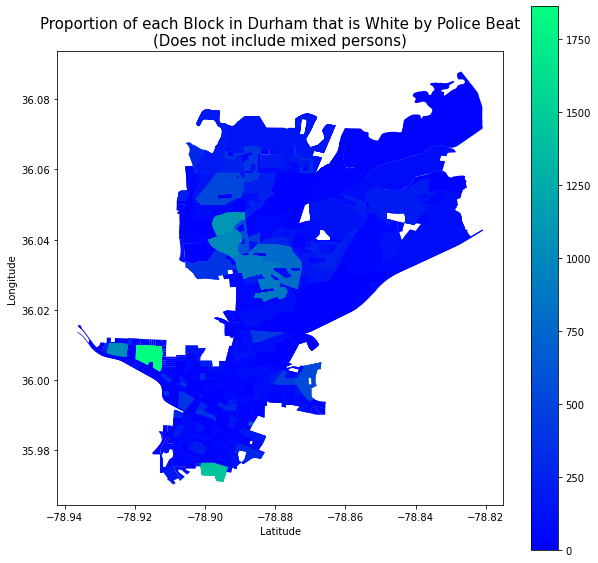

In [ ]:
# plotting the proportion of white people by block in just the saftey department beats
fig, ax = plt.subplots(figsize = (10,10))
blockswithrace.plot(column='total_',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [37]:
#putting race data into the police beat and block data
beatswithrace = gpd.sjoin(cblockDurhamBeats, durhamracemap)

#beatswithrace = pd.merge(racedata, cblockDurhamBeats, on ='GEOID20')
beatswithrace

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Beat,index_right,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite
55,37,063,002100,4022,370630021004022,Block 4022,G5040,R,None,None,S,3013615,21848,+36.1529771,-078.8218382,"POLYGON ((-78.83005 36.15072, -78.83001 36.150...",299,370630021004041,37,063,002100,4041,Block 4041,G5040,R,None,None,S,0,1813368,+36.1046200,-078.8143328,"Block 4041, Block Group 4, Census Tract 21, Du...",0,0,0,0,0,0,0,0,0,NaN
16245,37,063,002100,4029,370630021004029,Block 4029,G5040,R,None,None,S,0,61895,+36.1423701,-078.8293892,"POLYGON ((-78.83072 36.15059, -78.83041 36.150...",299,370630021004041,37,063,002100,4041,Block 4041,G5040,R,None,None,S,0,1813368,+36.1046200,-078.8143328,"Block 4041, Block Group 4, Census Tract 21, Du...",0,0,0,0,0,0,0,0,0,NaN
23710,37,063,002100,4028,370630021004028,Block 4028,G5040,R,None,None,S,2350855,647,+36.1481586,-078.8350039,"POLYGON ((-78.84532 36.15934, -78.84511 36.159...",299,370630021004041,37,063,002100,4041,Block 4041,G5040,R,None,None,S,0,1813368,+36.1046200,-078.8143328,"Block 4041, Block Group 4, Census Tract 21, Du...",0,0,0,0,0,0,0,0,0,NaN
55,37,063,002100,4022,370630021004022,Block 4022,G5040,R,None,None,S,3013615,21848,+36.1529771,-078.8218382,"POLYGON ((-78.83005 36.15072, -78.83001 36.150...",299,370630021004036,37,063,002100,4036,Block 4036,G5040,R,None,None,S,3671076,24717,+36.1197210,-078.8099627,"Block 4036, Block Group 4, Census Tract 21, Du...",14,14,10,2,0,1,0,1,0,0.714286
16245,37,063,002100,4029,370630021004029,Block 4029,G5040,R,None,None,S,0,61895,+36.1423701,-078.8293892,"POLYGON ((-78.83072 36.15059, -78.83041 36.150...",299,370630021004036,37,063,002100,4036,Block 4036,G5040,R,None,None,S,3671076,24717,+36.1197210,-078.8099627,"Block 4036, Block Group 4, Census Tract 21, Du...",14,14,10,2,0,1,0,1,0,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232591,37,063,001806,1031,370630018061031,Block 1031,G5040,R,None,None,S,25186,0,+35.9972701,-078.8099536,"POLYGON ((-78.81153 35.99685, -78.81128 35.997...",121,370630018114005,37,063,001811,4005,Block 4005,G5040,R,None,None,S,63215,0,+35.9945906,-078.8099328,"Block 4005, Block Group 4, Census Tract 18.11,...",96,93,3,75,0,3,0,12,3,0.031250
232591,37,063,001806,1031,370630018061031,Block 1031,G5040,R,None,None,S,25186,0,+35.9972701,-078.8099536,"POLYGON ((-78.81153 35.99685, -78.81128 35.997...",121,370630018061032,37,063,001806,1032,Block 1032,G5040,R,None,None,S,4206,0,+35.9967428,-078.8101726,"Block 1032, Block Group 1, Census Tract 18.06,...",7,5,5,0,0,0,0,0,2,0.714286
232591,37,063,001806,1031,370630018061031,Block 1031,G5040,R,None,None,S,25186,0,+35.9972701,-078.8099536,"POLYGON ((-78.81153 35.99685, -78.81128 35.997...",121,370630018061034,37,063,001806,1034,Block 1034,G5040,R,None,None,S,2261,0,+35.9971059,-078.8095656,"Block 1034, Block Group 1, Census Tract 18.06,...",17,16,8,3,1,0,0,4,1,0.470588
232591,37,063,001806,1031,370630018061031,Block 1031,G5040,R,None,None,S,25186,0,+35.9972701,-078.8099536,"POLYGON ((-78.81153 35.99685, -78.81128 35.997...",121,370630018061033,37,063,001806,1033,Block 1033,G5040,R,None,None,S,2288,0,+35.9974814,-078.8089847,"Block 1033, Block Group 1, Census Tract 18.06,...",0,0,0,0,0,0,0,0,0,NaN


In [38]:
#summing the population by police beat
popsumbybeat = beatswithrace.groupby('Beat', as_index=False).sum()
popsumbybeat.head()


,Beat,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite
0,111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,224.561182
1,112,17718915,0,19961528,6947,27224,25303,4356,10636,918,143,12,9238,1921,51.668028
2,113,20482283,13325,18511210,5125,35128,33053,7084,17577,585,723,5,7079,2075,111.234878
3,114,56673958,441791,65789793,437720,53897,50407,7336,28270,751,540,14,13496,3490,89.477459
4,121,154087358,1453287,147654293,1312755,66559,62690,14281,35776,804,447,34,11348,3869,156.976578


In [82]:
#adding beat geometry to popsumbybeat
raceineachbeat = pd.merge(popsumbybeat, policebeats, left_on='Beat', right_on='LAWBEAT')
raceineachbeat = raceineachbeat.to_crs("EPSG:4326")
#raceineachbeat = gpd.sjoin(policebeats, popsumbybeat)
raceineachbeat.head(3)

,Beat_x,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat_y,id
0,111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,224.561182,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0
1,112,17718915,0,19961528,6947,27224,25303,4356,10636,918,143,12,9238,1921,51.668028,112,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1
2,113,20482283,13325,18511210,5125,35128,33053,7084,17577,585,723,5,7079,2075,111.234878,113,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,113,2


In [83]:
#adding new columns to race in police beat data set
raceineachbeat['area'] = raceineachbeat.area
raceineachbeat['popdensity']= raceineachbeat['total_'] / raceineachbeat['area']
raceineachbeat['propwhite']= raceineachbeat['total_population_of_one_race_white_alone'] / raceineachbeat['total_']
raceineachbeat['propblack']= raceineachbeat['total_population_of_one_race_black_or_african_american_alone'] / raceineachbeat['total_']
raceineachbeat.head()

,Beat_x,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat_y,id,area,popdensity,propblack
0,111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,0.313050,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0,0.000187,1.752603e+08,0.403484
1,112,17718915,0,19961528,6947,27224,25303,4356,10636,918,143,12,9238,1921,0.160006,112,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1,0.000193,1.409325e+08,0.390685
2,113,20482283,13325,18511210,5125,35128,33053,7084,17577,585,723,5,7079,2075,0.201662,113,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,113,2,0.000200,1.752096e+08,0.500370
3,114,56673958,441791,65789793,437720,53897,50407,7336,28270,751,540,14,13496,3490,0.136111,114,"MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...",65,53321.980469,I,yes,D1,114,None,6.103382e+07,53321.974873,114,3,0.000616,8.750555e+07,0.524519
4,121,154087358,1453287,147654293,1312755,66559,62690,14281,35776,804,447,34,11348,3869,0.214562,121,"MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...",38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4,0.001061,6.270430e+07,0.537508


In [84]:
raceineachbeat.sort_values(by='popdensity', inplace=True, ascending=False)
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
raceineachbeat2 = raceineachbeat[raceineachbeat['Beat_y'].isin(commsafe_list)] 
raceineachbeat2

,Beat_x,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat_y,id,area,popdensity,propblack
33,511,29227231,0,16914231,0,44560,42006,22098,14985,105,3463,0,1355,2554,0.495916,511,"POLYGON ((-78.92318 36.01031, -78.92260 36.010...",53,32615.019531,I,yes,D5,511,None,2.129644e+07,32615.017763,511,33,0.000198,2.252941e+08,0.336288
35,513,7140807,0,7622230,0,18901,17938,4759,11196,66,614,7,1296,963,0.251786,513,"POLYGON ((-78.89561 35.99710, -78.89553 35.997...",61,20647.179688,I,yes,D5,513,None,9.114313e+06,20647.175971,513,35,0.000085,2.233281e+08,0.592350
25,411,19005913,11355,21263752,11355,38369,36368,5257,27083,214,264,44,3506,2001,0.137012,411,"POLYGON ((-78.90125 35.98965, -78.89941 35.988...",67,24141.640625,I,yes,D4,411,None,2.140812e+07,24141.641318,411,25,0.000199,1.930277e+08,0.705856
34,512,7656325,0,8126025,0,15694,14663,10676,2567,100,876,0,444,1031,0.680260,512,"POLYGON ((-78.90313 36.00376, -78.90298 36.003...",57,16338.889648,I,yes,D5,512,None,9.305014e+06,16338.888321,512,34,0.000086,1.816171e+08,0.163566
0,111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,0.313050,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0,0.000187,1.752603e+08,0.403484
1,112,17718915,0,19961528,6947,27224,25303,4356,10636,918,143,12,9238,1921,0.160006,112,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1,0.000193,1.409325e+08,0.390685
14,223,77596501,110426,85935741,399423,77982,72584,12220,49275,677,1465,16,8931,5398,0.156703,223,"MULTIPOLYGON (((-78.89380 36.06589, -78.89372 ...",21,16095.400391,I,no,D2,223,None,6.891411e+06,16095.395041,223,14,0.000654,1.193134e+08,0.631877
11,214,135818584,563391,149928491,823830,77236,72443,12037,44337,485,527,8,15049,4793,0.155847,214,"MULTIPOLYGON (((-78.85254 36.02879, -78.85254 ...",23,1715.291016,I,no,D2,214,None,1.329736e+05,1715.290848,214,11,0.001084,7.127281e+07,0.574046


In [ ]:
raceineachbeat.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

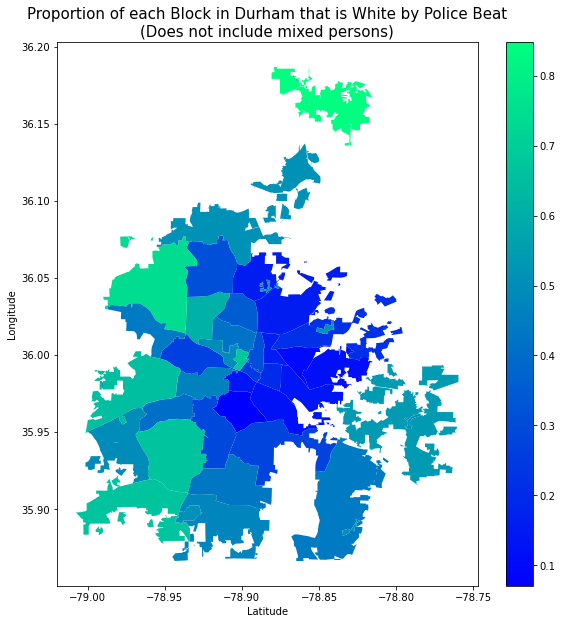

In [ ]:
#trying to plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='propwhite',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

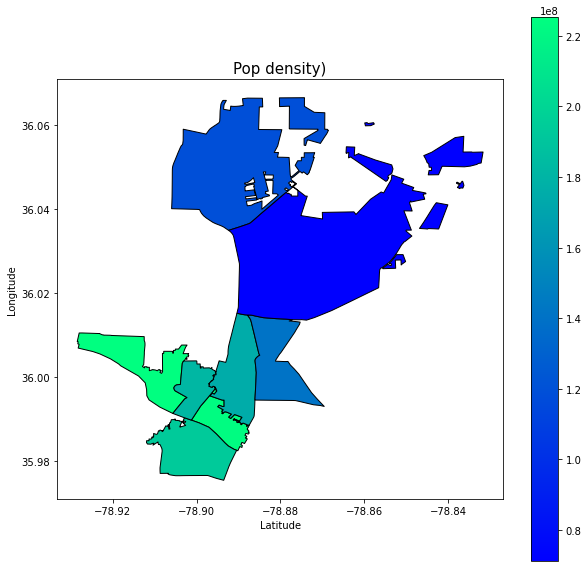

In [62]:
#trying to plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='popdensity',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Pop density)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [59]:
min(raceineachbeat.popdensity), max(raceineachbeat.popdensity)

(71272805.75245206, 225294111.73519093)

In [ ]:
len(set(list(raceineachbeat.Beat_x)))

37

In [ ]:
# singlebeat = policebeats[policebeats.LAWBEAT==214]
# singlebeat = singlebeat.reset_index()

# for ii in singlebeat.index:
#     if singlebeat.loc[ii, "geometry"].intersection(singlebeat.loc[ii, "geometry"]).area != singlebeat.loc[ii, "geometry"].area:
#         print("problem at", ii, singlebeat.loc[ii, "geometry"].intersection(singlebeat.loc[ii, "geometry"]).area- singlebeat.loc[ii, "geometry"].area)
#     for jj in range(ii+1,len(singlebeat)):
#         if abs(singlebeat.loc[ii, "geometry"].intersection(singlebeat.loc[jj, "geometry"]).area - singlebeat.loc[ii, "geometry"].area) < 10**-6:
#             print("same: ", ii, jj)
        


problem at 0 6.505213034913027e-19


In [ ]:
#trying to plot the race data by beat
fig, base = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='popdensity',
                                legend=True,
                                vmin = min(raceineachbeat.popdensity),
                                vmax = max(raceineachbeat.popdensity),
                                cmap="winter", ax=base, aspect=1, );

raceineachbeat[raceineachbeat.index==38].plot(ax = base, color="red")

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 2 Axes>

In [ ]:
Total = raceineachbeat['area'].sum()
Total


0.03170018445492205

In [ ]:
#seeing how many blocks there are per beat
blocksperbeat = beatswithrace.groupby( ["Beat"] ).size().to_frame(name = 'block_count').reset_index()
meanblocksperbeat = blocksperbeat[["block_count"]].mean()
blocksperbeat

KeyError: 'Beat'

192  pwd
  193  cd Documents/dataplus
  194  ls
  195  cd dataplus-project27-community-safety-durham/
  196  git log --oneline --decorate --graph --all
  198  git status
  199  git add
  200  git add 10_code/dpddata.ipynb
  201  git commit -m "createdracemaps"
  202  git push
  203  git pull


Starting to analyze how population and races affects calls by combining caller data with census data

In [89]:
beatracewithcalls = gpd.sjoin(raceineachbeat, nonzero)
beatracewithcalls

,Beat_x,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat_y,id,area,popdensity,propblack,index_right,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,261214,21447877,None,12/8/2021,6:49:22PM,Texting,3,SOUND OF SHOTS,1500-BLK DEXTER ST,2029136,825002,D2,212,Resolved Without Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,94554,21151431,21013879,5/3/2021,12:56:06AM,Wireless 911 Call,3,DOMESTIC VIOLENCE,600 W CLUB BLVD,2028825,825007,D2,212,Incident Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,126158,21204364,None,6/11/2021,11:07:59AM,E-911,3,WELFARE CHECK,600 W CLUB BLVD,2028722,825020,D2,212,Resolved Without Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,114553,21185085,21017066,5/28/2021,6:12:41PM,Wireless 911 Call,3,MOTOR VEHICLE ACCIDENT,600 W CLUB BLVD,2029295,825025,D2,212,Accident Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,117276,21189552,21017389,6/1/2021,10:18:38AM,Wireless 911 Call,3,MOTOR VEHICLE ACCIDENT,W CLUB BLVD/DEXTER ST,2029201,825025,D2,212,Accident Report,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,999,15400563,125985,23207376,128256,9616,9000,4916,2638,32,1068,3,343,616,0.511231,999,"MULTIPOLYGON (((-78.94297 35.89150, -78.94296 ...",4,1308.963013,None,None,DSO,DSO,None,6.932677e+04,1308.962953,999,36,0.000248,3.870973e+07,0.274334,273858,21470488,None,12/25/2021,10:12:58PM,Wireless 911 Call,2,ASSIST EMS,7300 FAYETTEVILLE RD,2017053,780262,D3,324,Resolved Without Report,0
16,299,174966000,21705937,159920971,26371534,4471,4223,3791,356,8,24,0,44,248,0.847909,299,"MULTIPOLYGON (((-78.86038 36.15712, -78.86107 ...",1,29657.869141,None,None,D2,SSA,None,2.075708e+07,29657.868615,299,16,0.001197,3.734425e+06,0.079624,1567,21002637,None,1/3/2021,12:17:18PM,Phone Call,9,NOTIFY POLICE,2800 BAHAMA RD,2042263,881370,None,None,Resolved Without Report,0
16,299,174966000,21705937,159920971,26371534,4471,4223,3791,356,8,24,0,44,248,0.847909,299,"MULTIPOLYGON (((-78.86038 36.15712, -78.86107 ...",1,29657.869141,None,None,D2,SSA,None,2.075708e+07,29657.868615,299,16,0.001197,3.734425e+06,0.079624,82450,21132120,21012155,4/18/2021,1:42:42PM,Phone Call,1,SINKING VEH / VEH IN FLOOD,2800 BAHAMA RD,2042176,881384,None,None,Incident Report,0
16,299,174966000,21705937,159920971,26371534,4471,4223,3791,356,8,24,0,44,2

In [90]:
beatracewithcalls.groupby('Beat', as_index=False).sum()
beatracewithcalls2 = beatracewithcalls.groupby( ["Beat"] ).size().to_frame(name = 'dpdcalls_count').reset_index()
beatracewithcalls

,Beat_x,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat_y,id,area,popdensity,propblack,index_right,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,261214,21447877,None,12/8/2021,6:49:22PM,Texting,3,SOUND OF SHOTS,1500-BLK DEXTER ST,2029136,825002,D2,212,Resolved Without Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,94554,21151431,21013879,5/3/2021,12:56:06AM,Wireless 911 Call,3,DOMESTIC VIOLENCE,600 W CLUB BLVD,2028825,825007,D2,212,Incident Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,126158,21204364,None,6/11/2021,11:07:59AM,E-911,3,WELFARE CHECK,600 W CLUB BLVD,2028722,825020,D2,212,Resolved Without Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,114553,21185085,21017066,5/28/2021,6:12:41PM,Wireless 911 Call,3,MOTOR VEHICLE ACCIDENT,600 W CLUB BLVD,2029295,825025,D2,212,Accident Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,117276,21189552,21017389,6/1/2021,10:18:38AM,Wireless 911 Call,3,MOTOR VEHICLE ACCIDENT,W CLUB BLVD/DEXTER ST,2029201,825025,D2,212,Accident Report,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,999,15400563,125985,23207376,128256,9616,9000,4916,2638,32,1068,3,343,616,0.511231,999,"MULTIPOLYGON (((-78.94297 35.89150, -78.94296 ...",4,1308.963013,None,None,DSO,DSO,None,6.932677e+04,1308.962953,999,36,0.000248,3.870973e+07,0.274334,273858,21470488,None,12/25/2021,10:12:58PM,Wireless 911 Call,2,ASSIST EMS,7300 FAYETTEVILLE RD,2017053,780262,D3,324,Resolved Without Report,0
16,299,174966000,21705937,159920971,26371534,4471,4223,3791,356,8,24,0,44,248,0.847909,299,"MULTIPOLYGON (((-78.86038 36.15712, -78.86107 ...",1,29657.869141,None,None,D2,SSA,None,2.075708e+07,29657.868615,299,16,0.001197,3.734425e+06,0.079624,1567,21002637,None,1/3/2021,12:17:18PM,Phone Call,9,NOTIFY POLICE,2800 BAHAMA RD,2042263,881370,None,None,Resolved Without Report,0
16,299,174966000,21705937,159920971,26371534,4471,4223,3791,356,8,24,0,44,248,0.847909,299,"MULTIPOLYGON (((-78.86038 36.15712, -78.86107 ...",1,29657.869141,None,None,D2,SSA,None,2.075708e+07,29657.868615,299,16,0.001197,3.734425e+06,0.079624,82450,21132120,21012155,4/18/2021,1:42:42PM,Phone Call,1,SINKING VEH / VEH IN FLOOD,2800 BAHAMA RD,2042176,881384,None,None,Incident Report,0
16,299,174966000,21705937,159920971,26371534,4471,4223,3791,356,8,24,0,44,2

In [116]:
beatracewithcalls['Beat_x']= beatracewithcalls['Beat_x'].map(str)
beatracewithcalls

,Beat_x,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat_y,id,area,popdensity,propblack,index_right,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,261214,21447877,None,12/8/2021,6:49:22PM,Texting,3,SOUND OF SHOTS,1500-BLK DEXTER ST,2029136,825002,D2,212,Resolved Without Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,94554,21151431,21013879,5/3/2021,12:56:06AM,Wireless 911 Call,3,DOMESTIC VIOLENCE,600 W CLUB BLVD,2028825,825007,D2,212,Incident Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,126158,21204364,None,6/11/2021,11:07:59AM,E-911,3,WELFARE CHECK,600 W CLUB BLVD,2028722,825020,D2,212,Resolved Without Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,114553,21185085,21017066,5/28/2021,6:12:41PM,Wireless 911 Call,3,MOTOR VEHICLE ACCIDENT,600 W CLUB BLVD,2029295,825025,D2,212,Accident Report,0
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,0.420777,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,0.000400,2.687990e+08,0.416196,117276,21189552,21017389,6/1/2021,10:18:38AM,Wireless 911 Call,3,MOTOR VEHICLE ACCIDENT,W CLUB BLVD/DEXTER ST,2029201,825025,D2,212,Accident Report,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,999,15400563,125985,23207376,128256,9616,9000,4916,2638,32,1068,3,343,616,0.511231,999,"MULTIPOLYGON (((-78.94297 35.89150, -78.94296 ...",4,1308.963013,None,None,DSO,DSO,None,6.932677e+04,1308.962953,999,36,0.000248,3.870973e+07,0.274334,273858,21470488,None,12/25/2021,10:12:58PM,Wireless 911 Call,2,ASSIST EMS,7300 FAYETTEVILLE RD,2017053,780262,D3,324,Resolved Without Report,0
16,299,174966000,21705937,159920971,26371534,4471,4223,3791,356,8,24,0,44,248,0.847909,299,"MULTIPOLYGON (((-78.86038 36.15712, -78.86107 ...",1,29657.869141,None,None,D2,SSA,None,2.075708e+07,29657.868615,299,16,0.001197,3.734425e+06,0.079624,1567,21002637,None,1/3/2021,12:17:18PM,Phone Call,9,NOTIFY POLICE,2800 BAHAMA RD,2042263,881370,None,None,Resolved Without Report,0
16,299,174966000,21705937,159920971,26371534,4471,4223,3791,356,8,24,0,44,248,0.847909,299,"MULTIPOLYGON (((-78.86038 36.15712, -78.86107 ...",1,29657.869141,None,None,D2,SSA,None,2.075708e+07,29657.868615,299,16,0.001197,3.734425e+06,0.079624,82450,21132120,21012155,4/18/2021,1:42:42PM,Phone Call,1,SINKING VEH / VEH IN FLOOD,2800 BAHAMA RD,2042176,881384,None,None,Incident Report,0
16,299,174966000,21705937,159920971,26371534,4471,4223,3791,356,8,24,0,44,2

In [112]:
beatracewithcalls2

,Beat,dpdcalls_count
0,111,2730
1,112,2662
2,113,3095
3,114,3041
4,121,2774
5,122,3492
6,123,2890
7,124,2031
8,211,4174
9,212,3404


In [117]:
beatracewithcallsandcallcountperbeat = pd.merge(beatracewithcalls2, beatracewithcalls, left_on ='Beat', right_on='Beat')
beatracewithcallsandcallcountperbeat
beatracewithcallsandcallcountperbeat = beatracewithcallsandcallcountperbeat.groupby('Beat', as_index=False).mean()
beatracewithcallsandcallcountperbeat

,Beat,dpdcalls_count,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,LAWBEAT,OBJECTID,PERIMETER,ShapeSTAre,ShapeSTLen,Beat_y,id,area,popdensity,propblack,index_right,Event Numb,X,Y,Cancelled
0,111,2730.0,1.773510e+07,4.543128e+02,1.892170e+07,7.100304e+03,32995.417949,29951.394872,10220.754945,13407.273993,722.493407,513.844689,36.314286,5050.713553,3044.023077,0.307617,115.813919,50.278755,28373.305835,2.020205e+07,28373.304875,115.813919,0.476557,0.000188,1.753815e+08,0.406680,143644.363736,2.123913e+07,2.032526e+06,817934.971062,0.0
1,112,2662.0,1.836430e+07,1.729991e+03,2.071944e+07,1.076889e+04,27900.820811,25915.260706,4516.698723,11085.252817,912.077761,159.602930,12.686702,9228.941773,1985.560105,0.162013,112.394065,51.179564,26468.711627,2.112767e+07,26468.714456,112.394065,1.109316,0.000198,1.417155e+08,0.395130,142854.993614,2.123806e+07,2.035575e+06,818740.427122,0.0
2,113,3095.0,2.093471e+07,1.925334e+04,1.921044e+07,1.144922e+04,35254.902746,33155.113086,7070.103393,17595.097900,592.707270,710.368013,5.477544,7181.358966,2099.789661,0.200994,113.373183,61.797092,21280.903673,2.213099e+07,21280.903440,113.373183,2.017447,0.000206,1.734941e+08,0.498531,139758.375767,2.123245e+07,2.035290e+06,814329.243619,0.0
3,114,3041.0,5.616347e+07,4.345675e+05,6.509926e+07,4.309501e+05,53573.397895,50104.360737,7334.642223,28059.752713,750.653075,541.806643,13.921736,13403.584347,3469.037159,0.136950,114.010523,64.874383,52781.404508,6.032729e+07,52781.399033,114.010523,2.988819,0.000609,8.883552e+07,0.523510,140365.048997,2.123384e+07,2.040309e+06,812025.249918,0.0
4,121,2774.0,1.528782e+08,1.433976e+06,1.467390e+08,1.298607e+06,66423.343547,62553.604182,14176.950973,35707.009373,802.338861,446.671233,33.697549,11386.936193,3869.739366,0.213513,122.725667,37.965393,14574.311645,7.185341e+06,14574.311565,122.725667,4.099856,0.001055,6.330105e+07,0.537105,143276.432228,2.123883e+07,2.045708e+06,824082.238645,0.0
5,122,3492.0,3.612645e+07,4.340772e+04,4.499976e+07,1.253589e+05,42815.468786,39459.596220,4345.065865,20778.165521,1044.890893,176.032932,24.341924,13091.099084,3355.872566,0.100614,121.912944,53.896907,36824.136891,3.452375e+07,36824.138458,121.912944,4.971363,0.000332,1.309327e+08,0.484228,143288.199026,2.123884e+07,2.039440e+06,817610.086483,0.0
6,123,2890.0,1.023509e+08,1.281100e+06,9.294168e+07,1.249026e+06,92671.807612,87525.921799,10921.092042,50321.128720,923.202076,975.136332,65.737024,24319.625606,5145.885813,0.117880,122.990311,54.948789,74053.604679,7.460033e+07,74053.601786,122.990311,5.990311,0.000710,1.306237e+08,0.542863,145613.860208,2.124278e+07,2.046140e+06,815393.387543,0.0
7,124,2031.0,4.270284e+08,2.613100e+06,3.470854e+08,3.093508e+06,145837.895618,137651.624815,79268.373215,43287.975382,335.850320,8332.421467,5.998523,6421.005908,8186.270803,0.543523,124.430822,62.970950,10703.442490,3.021134e+06,10703.442628,124.430822,7.014279,0.002268,6.430190e+07,0.296812,144575.212703,2.124103e+07,2.058149e+06,802870.482521,0.0
8,211,4174.0,5.787947e+07,1.915738e+04,5.845715e+07,2.795365e+05,65689.347149,60574.902731,39508.671538,10713.895544,326.149018,3913.651893,44.837805,6067.696933,5114.444418,0.604273,212.502635,35.956636,36960.623248,6.507565e+07,36960.619487,212.502635,8.186152,0.000605,1.099705e+08,0.159939,139253.800910,2.123164e+07,2.022354e+06,828176.553186,0.0
9,212,3404.0,3.805865e+07,2.815276e+01,4.624724e+07,6.159891e+02,106246.831081,98947.671857,44720.749412,44144.108402,643.910106,2419.801704,18.042009,7001.060223,7299.159224,0.421292,213.109577,43.071093,36976.254377,4.278594e+07,36976.251832,213.109577,

In [118]:
column_1 = beatracewithcallsandcallcountperbeat["popdensity"]
column_2 = beatracewithcallsandcallcountperbeat["dpdcalls_count"]
correlation = column_1.corr(column_2)
correlation

-0.18796498884488258

In [157]:
policebeats_w_dpd = gpd.sjoin(policebeats, nonzero)
allcalls = policebeats_w_dpd.groupby(['LAWBEAT']).size().to_frame(name = 'calls_count').reset_index()
callcount_w_beat = pd.merge(allcalls, policebeats, on ='LAWBEAT')
callcount_w_beat
#policebeats_w_dpd

,LAWBEAT,calls_count,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat,id
0,111,2805,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0
1,112,2638,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1
2,113,3198,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,113,2
3,114,3081,"MULTIPOLYGON (((-78.83998 35.95407, -78.83974 ...",65,53321.980469,I,yes,D1,114,None,6.103382e+07,53321.974873,114,3
4,121,2773,"MULTIPOLYGON (((-78.80704 35.99734, -78.80716 ...",38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4
5,122,3498,"POLYGON ((-78.84694 36.00614, -78.84634 36.006...",54,36686.679688,I,yes,D1,122,None,3.436298e+07,36686.681354,122,5
6,123,2900,"MULTIPOLYGON (((-78.83722 36.00417, -78.83717 ...",55,74375.859375,I,yes,D1,123,None,7.495698e+07,74375.856455,123,6
7,124,2036,"MULTIPOLYGON (((-78.79525 35.94118, -78.79536 ...",63,10708.070312,I,no,D1,124,None,3.022588e+06,10708.070450,124,7
8,211,4141,"POLYGON ((-78.91430 36.04098, -78.91427 36.040...",36,36748.878906,I,yes,D2,211,None,6.487864e+07,36748.875052,211,8
9,212,3505,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9


In [147]:
beatsgeometries = gpd.sjoin(policebeats_w_dpd, cblockDurhamBeats)
#cblockDurhamBeats['area'] = cblockDurhamBeats.area
#cblockDurhamBeats = beatswithrace.groupby('Beat', as_index=False).sum()


ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined

In [143]:
beatswithrace = gpd.sjoin(cblockDurhamBeats, durhamracemap)
beatswithrace['area'] = beatswithrace.area
beatswithrace = beatswithrace.groupby('Beat', as_index=False).sum()
beatswithrace

,Beat,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,area
0,111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,224.561182,0.001757
1,112,17718915,0,19961528,6947,27224,25303,4356,10636,918,143,12,9238,1921,51.668028,0.001771
2,113,20482283,13325,18511210,5125,35128,33053,7084,17577,585,723,5,7079,2075,111.234878,0.002048
3,114,56673958,441791,65789793,437720,53897,50407,7336,28270,751,540,14,13496,3490,89.477459,0.005707
4,121,154087358,1453287,147654293,1312755,66559,62690,14281,35776,804,447,34,11348,3869,156.976578,0.015550
5,122,34177498,14796,43393769,101009,42111,38772,4159,20347,1051,164,24,13027,3339,27.611617,0.003418
6,123,102491731,1285915,92996338,1253648,92956,87799,10940,50487,923,980,66,24403,5157,72.625563,0.010372
7,124,427231134,2614325,347244907,3094969,145905,137715,79305,43308,336,8336,6,6424,8190,589.766884,0.042943
8,211,57208452,0,57777431,270734,64744,59682,39506,9930,319,3950,45,5932,5062,554.138837,0.005720
9,212,38220261,0,46543981,0,107387,100017,45186,44694,648,2435,18,7036,7370,777.792805,0.003821


In [140]:
popsumbybeat = beatswithrace.groupby('Beat', as_index=False).mean()
popsumbybeat

,Beat,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite
0,111,2.540382e+04,0.000000,2.709089e+04,10.039017,47.283237,42.829480,14.802023,19.078035,1.052023,0.729769,0.054913,7.112717,4.453757,0.354757
1,112,5.537161e+04,0.000000,6.237978e+04,21.709375,85.075000,79.071875,13.612500,33.237500,2.868750,0.446875,0.037500,28.868750,6.003125,0.178166
2,113,3.080043e+04,20.037594,2.783641e+04,7.706767,52.824060,49.703759,10.652632,26.431579,0.879699,1.087218,0.007519,10.645113,3.120301,0.190797
3,114,8.652513e+04,674.490076,1.004424e+05,668.274809,82.285496,76.957252,11.200000,43.160305,1.146565,0.824427,0.021374,20.604580,5.328244,0.181496
4,121,2.242902e+05,2115.410480,2.149262e+05,1910.851528,96.883552,91.251820,20.787482,52.075691,1.170306,0.650655,0.049491,16.518195,5.631732,0.279318
5,122,1.170462e+05,50.671233,1.486088e+05,345.921233,144.215753,132.780822,14.243151,69.681507,3.599315,0.561644,0.082192,44.613014,11.434932,0.128426
6,123,2.568715e+05,3222.844612,2.330735e+05,3141.974937,232.972431,220.047619,27.418546,126.533835,2.313283,2.456140,0.165414,61.160401,12.924812,0.191624
7,124,3.569182e+05,2184.064327,2.900960e+05,2585.604845,121.892231,115.050125,66.253133,36.180451,0.280702,6.964077,0.005013,5.366750,6.842105,0.548110
8,211,6.191391e+04,0.000000,6.252969e+04,293.002165,70.069264,64.590909,42.755411,10.746753,0.345238,4.274892,0.048701,6.419913,5.478355,0.686665
9,212,2.910911e+04,0.000000,3.544858e+04,0.000000,81.787510,76.174410,34.414318,34.039604,0.493526,1.854532,0.013709,5.358720,5.613100,0.633898


In [43]:
#seeing how many calls there are per beat
callsperbeat = beatracewithcalls.groupby( ["Beat_x"] ).size().to_frame(name = 'dpdcalls_count').reset_index()
meancallsperbeat = callsperbeat[["dpdcalls_count"]].mean()
meancallsperbeat
callsperbeat

,Beat_x,dpdcalls_count
0,111,2805
1,112,2638
2,113,3198
3,114,3081
4,121,2773
5,122,3498
6,123,2900
7,124,2036
8,211,4141
9,212,3505


In [70]:
nonzerocallsperbeat = nonzero.groupby( ["Beat"] ).size().to_frame(name = 'dpdcalls_count').reset_index()
meancallsperbeat = nonzerocallsperbeat[["dpdcalls_count"]].mean()
nonzerocallsperbeat["Beat"] = nonzerocallsperbeat["Beat"].astype(str).astype(int)
nonzerocallsperbeat

,Beat,dpdcalls_count
0,111,2730
1,112,2662
2,113,3095
3,114,3059
4,121,2812
5,122,3494
6,123,2928
7,124,2067
8,211,4174
9,212,3404


In [122]:
policebeats_w_dpdonlycalls = pd.merge(policebeats, nonzerocallsperbeat, left_on ='LAWBEAT', right_on = 'Beat')
policebeats_w_dpdonlycalls

,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat_x,id,Beat_y,dpdcalls_count
0,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0,111,2730
1,112,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1,112,2662
2,113,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,113,2,113,3095
3,114,"MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...",65,53321.980469,I,yes,D1,114,None,6.103382e+07,53321.974873,114,3,114,3059
4,121,"MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...",38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4,121,2812
5,122,"POLYGON ((-78.84694 36.00614, -78.84634 36.006...",54,36686.679688,I,yes,D1,122,None,3.436298e+07,36686.681354,122,5,122,3494
6,123,"MULTIPOLYGON (((-78.83723 36.00399, -78.83722 ...",55,74375.859375,I,yes,D1,123,None,7.495698e+07,74375.856455,123,6,123,2928
7,124,"MULTIPOLYGON (((-78.77636 35.92139, -78.77722 ...",63,10708.070312,I,no,D1,124,None,3.022588e+06,10708.070450,124,7,124,2067
8,211,"POLYGON ((-78.91430 36.04098, -78.91427 36.040...",36,36748.878906,I,yes,D2,211,None,6.487864e+07,36748.875052,211,8,211,4174
9,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9,212,3404


In [123]:
Total = nonzerocallsperbeat['dpdcalls_count'].sum()
Total

122107

In [127]:
dpdbeats = ['511', '512', '513', '411', '111', '112', '214', '223']
dpdbeatracewithcalls = beatracewithcalls[beatracewithcalls['Beat'].isin(dpdbeats)] 
dpdbeatracewithcalls('Beat')

TypeError: 'GeoDataFrame' object is not callable

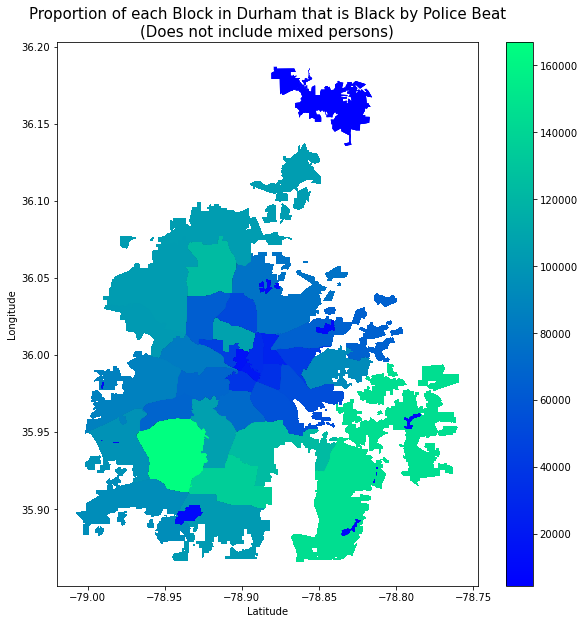

In [160]:
#trying to plot the race data by beat
fig, base = plt.subplots(figsize = (10,10))
beatracewithcalls.plot(column='total_',
                                legend=True,
                                cmap="winter", ax=base, aspect=1, );

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [46]:
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
policebeatscomm = policebeats[policebeats['Beat'].isin(commsafe_list)] 
policebeatscomm

,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat,id
0,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0
1,112,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1
11,214,"MULTIPOLYGON (((-78.85254 36.02879, -78.85254 ...",23,1715.291016,I,no,D2,214,None,1.329736e+05,1715.290848,214,11
14,223,"MULTIPOLYGON (((-78.89380 36.06589, -78.89372 ...",21,16095.400391,I,no,D2,223,None,6.891411e+06,16095.395041,223,14
25,411,"POLYGON ((-78.90125 35.98965, -78.89941 35.988...",67,24141.640625,I,yes,D4,411,None,2.140812e+07,24141.641318,411,25
33,511,"POLYGON ((-78.92318 36.01031, -78.92260 36.010...",53,32615.019531,I,yes,D5,511,None,2.129644e+07,32615.017763,511,33
34,512,"POLYGON ((-78.90313 36.00376, -78.90298 36.003...",57,16338.889648,I,yes,D5,512,None,9.305014e+06,16338.888321,512,34
35,513,"POLYGON ((-78.89561 35.99710, -78.89553 35.997...",61,20647.179688,I,yes,D5,513,None,9.114313e+06,20647.175971,513,35


In [47]:
policebeats_w_dpd = gpd.sjoin(policebeatscomm, nonzero)

In [48]:
allcalls = policebeats_w_dpd.groupby(['LAWBEAT']).size().to_frame(name = 'calls_count').reset_index()
allcalls

,LAWBEAT,calls_count
0,111,2805
1,112,2638
2,214,3916
3,223,5388
4,411,3908
5,511,2568
6,512,2933
7,513,3512


In [121]:
populationbybeat = gpd.sjoin(durhamracemap, policebeats_w_dpdonlycalls)
populationbybeat['callsperperson']= populationbybeat['dpdcalls_count'] / populationbybeat['total_']
populationbybeat

,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geometry,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,index_right,LAWBEAT,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat_x,id,Beat_y,dpdcalls_count,callsperperson
GEOID20,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
370630018064007,37,063,001806,4007,Block 4007,G5040,R,None,None,S,166664,5599,+36.0127651,-078.8227713,"POLYGON ((-78.82464 36.01317, -78.82456 36.013...","Block 4007, Block Group 4, Census Tract 18.06,...",80,73,41,1,0,0,0,31,7,0.512500,4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4,121,2812,35.150000
370630018011025,37,063,001801,1025,Block 1025,G5040,R,None,None,S,107654,7350,+36.0128630,-078.8662020,"POLYGON ((-78.86911 36.01263, -78.86898 36.012...","Block 1025, Block Group 1, Census Tract 18.01,...",26,21,0,1,3,0,0,17,5,0.000000,4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4,121,2812,108.153846
370630018063000,37,063,001806,3000,Block 3000,G5040,R,None,None,S,824122,6737,+36.0263881,-078.8140738,"POLYGON ((-78.82083 36.02412, -78.82079 36.024...","Block 3000, Block Group 3, Census Tract 18.06,...",50,49,34,2,0,0,0,13,1,0.680000,4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4,121,2812,56.240000
370630018114004,37,063,001811,4004,Block 4004,G5040,R,None,None,S,89269,861,+35.9949275,-078.8067678,"POLYGON ((-78.80971 35.99661, -78.80968 35.996...","Block 4004, Block Group 4, Census Tract 18.11,...",127,124,21,80,9,0,0,14,3,0.165354,4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4,121,2812,22.141732
370630018014007,37,063,001801,4007,Block 4007,G5040,R,None,None,S,739833,2198,+36.0137131,-078.8471027,"POLYGON ((-78.85360 36.01812, -78.85270 36.018...","Block 4007, Block Group 4, Census Tract 18.01,...",289,276,48,182,3,0,0,43,13,0.166090,4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4,121,2812,9.730104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370630011001025,37,063,001100,1025,Block 1025,G5040,R,None,None,S,4195,0,+35.9862294,-078.8911487,"POLYGON ((-78.89166 35.98589, -78.89139 35.986...","Block 1025, Block Group 1, Census Tract 11, Du...",17,12,2,10,0,0,0,0,5,0.117647,34,513,61,20647.179688,I,yes,D5,513,None,9.114313e+06,20647.175971,513,35,513,3617,212.764706
370630011001014,37,063,001100,1014,Block 1014,G5040,R,None,None,S,2602,0,+35.9895249,-078.8966821,"POLYGON ((-78.89711 35.99050, -78.89710 35.990...","Block 1014, Block Group 1, Census Tract 11, Du...",0,0,0,0,0,0,0,0,0,NaN,34,513,61,20647.179688,I,yes,D5,513,None,9.114313e+06,20647.175971,513,35,513,3617,inf
370630011001037,37,063,001100,1037,Block 1037,G5040,R,None,None,S,3545,0,+35.9857918,-078.8922443,"POLYGON ((-78.89266 35.98608, -78.89257 35.986...","Block 1037, Block Group 1, Census Tract 11, Du...",9,6,0,5,0,1,0,0,3,0.000000,34,513,61,20647.179688,I,yes,D5,513,None,9.114313e+06,20647.175971,513,35,513,3617,401.888889


In [153]:
#raceineachbeat = pd.merge(beatracewithcalls, allcalls, left_on='Beat_x', right_on='LAWBEAT')
calls_per_person = beatracewithcalls.set_index('Beat_x').join(allcalls.set_index('LAWBEAT'))
#calls_per_person = calls_per_person.groupby('Beat', as_index=False).mean()
calls_per_person['callsperperson']= calls_per_person['calls_count'] / calls_per_person['total_']
calls_per_person

,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_mixed_races,propwhite,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat_y,id,area,popdensity,propblack,index_right,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,calls_count,callsperperson
111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,0.313050,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0,0.000187,1.752603e+08,0.403484,229318,21388379,None,10/23/2021,8:32:13PM,Phone Call,4,NOISE COMPLAINT,1100 WORTH ST,2033394,815007,D1,111,Resolved Without Report,0,NaN,NaN
111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,0.313050,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0,0.000187,1.752603e+08,0.403484,130015,21210928,None,6/16/2021,7:35:37AM,Phone Call,4,NOTIFY POLICE,1100 WALL ST,2033446,815204,D1,111,Resolved Without Report,0,NaN,NaN
111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,0.313050,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0,0.000187,1.752603e+08,0.403484,79642,21127611,None,4/14/2021,7:21:05PM,Wireless 911 Call,3,SUSPICIOUS PERSON,1100 FRANKLIN ST,2033403,815226,D1,111,Unfounded,0,NaN,NaN
111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,0.313050,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0,0.000187,1.752603e+08,0.403484,54521,21086800,None,3/14/2021,5:51:26AM,Phone Call,P,UNKNOWN PROBLEM EMS,1100 WALL ST,2033517,815316,D1,111,Unfounded,0,NaN,NaN
111,17579442,0,18746893,6947,32720,29638,10243,13202,728,505,38,4922,3082,0.313050,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0,0.000187,1.752603e+08,0.403484,223408,21377334,None,10/15/2021,3:03:22PM,Phone Call,4,PARKING VIOLATION,1100 WALL ST,2033425,815318,D1,111,Unfounded,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,15400563,125985,23207376,128256,9616,9000,4916,2638,32,1068,3,343,616,0.511231,999,"MULTIPOLYGON (((-78.94297 35.89150, -78.94296 ...",4,1308.963013,None,None,DSO,DSO,None,6.932677e+04,1308.962953,999,36,0.000248,3.870973e+07,0.274334,112677,21181875,None,5/26/2021,3:20:07PM,Phone Call,3,TRAFFIC HAZARD,BARBEE RD/HERNDON RD,2021358,783360,D4,422,Resolved Without Report,0,NaN,NaN
999,15400563,125985,23207376,128256,9616,9000,4916,2638,32,1068,3,343,616,0.511231,999,"MULTIPOLYGON (((-78.94297 35.89150, -78.94296 ...",4,1308.963013,None,None,DSO,DSO,None,6.932677e+04,1308.962953,999,36,0.000248,3.870973e+07,0.274334,67540,21107612,None,3/30/2021,4:56:13PM,Phone Call,4,FOLLOW UP,BARBEE RD/HERNDON RD,2021339,783370,D4,422,Resolved Without Report,0,NaN,NaN
999,15400563,125985,23207376,128256,9616,9000,4916,2638,32,1068,3,343,616,0.511231,999,"MULTIPOLYGON (((-78.94297 35.89150, -78.94296 ...",4,1308.963013,None,None,DSO,DSO,None,6.932677e+04,1308.962953,999,36,0.000248,3.870973e+07,0.274334,86555,21138548,21012693,4/23/2021,10:58:24AM,Wireless 911 Call,P,GUNSHOT WOUND,5200 OLD CHAPEL HILL RD,2002659,798651,D3,323,Incident Report,0,NaN,NaN
999,15400563,125985,23207376,128256,9616,9000,4916,2638,32,1068,3,343,616,0.

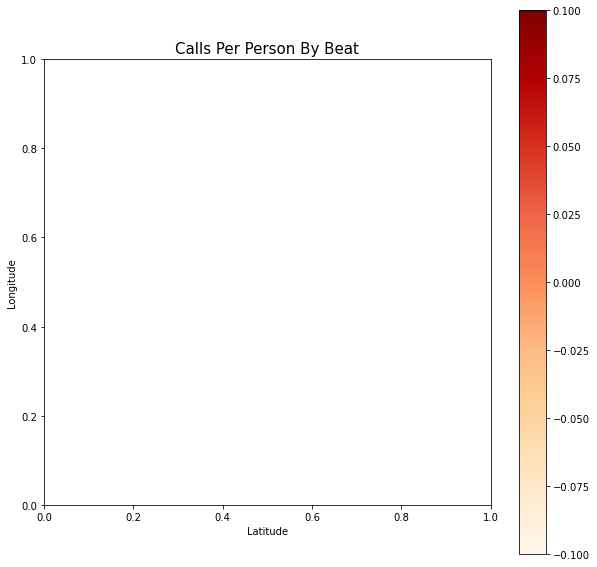

In [154]:
#trying to plot the race data by beat
fig, base = plt.subplots(figsize = (10,10))
calls_per_person.plot(column='callsperperson',
                                legend=True,
                                cmap="OrRd", ax=base, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Calls Per Person By Beat", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()